# **Linear Regression with Time Series**

## **Librerías**

In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.options.display.max_columns = False

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
from sklearn.linear_model import LinearRegression

## **Datos**

In [99]:
# Cargamos nuestro dataset
book_sales = pd.read_csv(
                        '../../Data/book_sales.csv', 
                        index_col='Date', 
                        parse_dates=['Date']
                        ).drop('Paperback', axis=1)

In [100]:
len(book_sales)

30

In [101]:
# Nuestro dataset contiene la cantidad de ventas por día para un periodo de un mes
book_sales.head(3)

,Hardcover
Date,
2000-04-01,139
2000-04-02,128
2000-04-03,172


## **Trabajando con la Data**

### **Time Features**

In [102]:
# Agregamos una columna para representar los periodos
book_sales['Time'] = np.arange(len(book_sales))
book_sales.head(3)

,Hardcover,Time
Date,,
2000-04-01,139,0
2000-04-02,128,1
2000-04-03,172,2


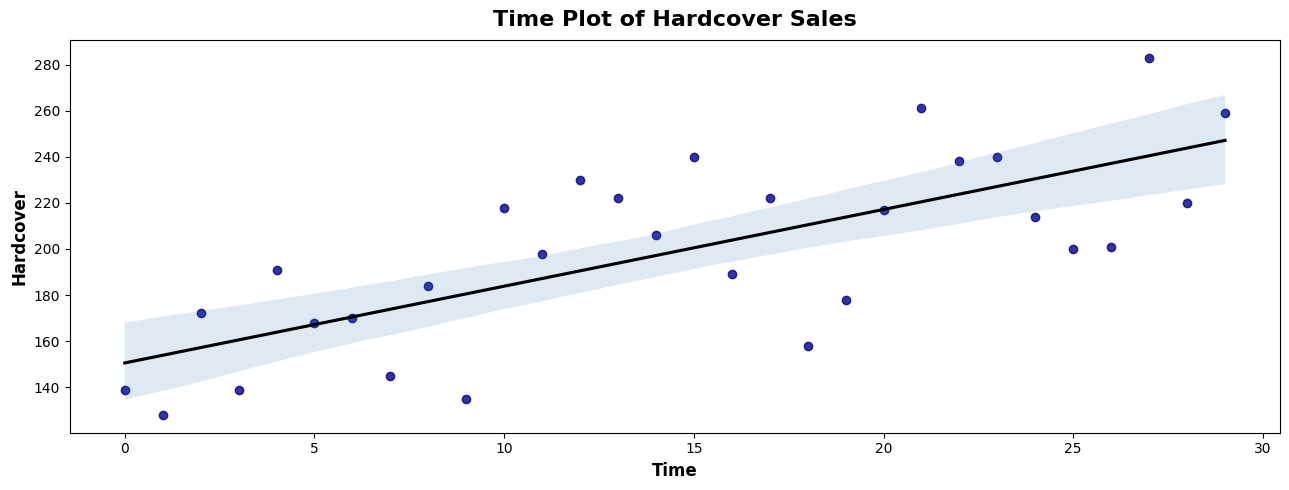

In [103]:
fig, ax = plt.subplots(figsize=(13, 5))

# Agregamos la Regresión Lineal
ax = sns.regplot(
    x='Time',
    y='Hardcover',
    data=book_sales,
    scatter_kws=dict(color='darkblue'),
    ci=95
)

# Ajustamos el color de nuestra Regresión
ax.get_lines()[0].set_color('black')

# Configuramos titulos y ejes
plt.title('Time Plot of Hardcover Sales')

plt.show()

Podemos observar una ***tendencia*** positiva conforme van pasando los días del mes.

### **Lag Features**

Ahora intentaremos identificar si cada uno de los registros depende del valor del anterior registro respectivamente.

In [104]:
# Agregamos una variable de rezago
book_sales['Lag_1'] = book_sales['Hardcover'].shift(1)
book_sales.head(3)

,Hardcover,Time,Lag_1
Date,,,
2000-04-01,139,0,NaN
2000-04-02,128,1,139.0
2000-04-03,172,2,128.0


In [105]:
# Ajustamos el indice
book_sales = book_sales.reindex(columns=['Hardcover', 'Time', 'Lag_1'])
book_sales.head(3)

,Hardcover,Time,Lag_1
Date,,,
2000-04-01,139,0,NaN
2000-04-02,128,1,139.0
2000-04-03,172,2,128.0


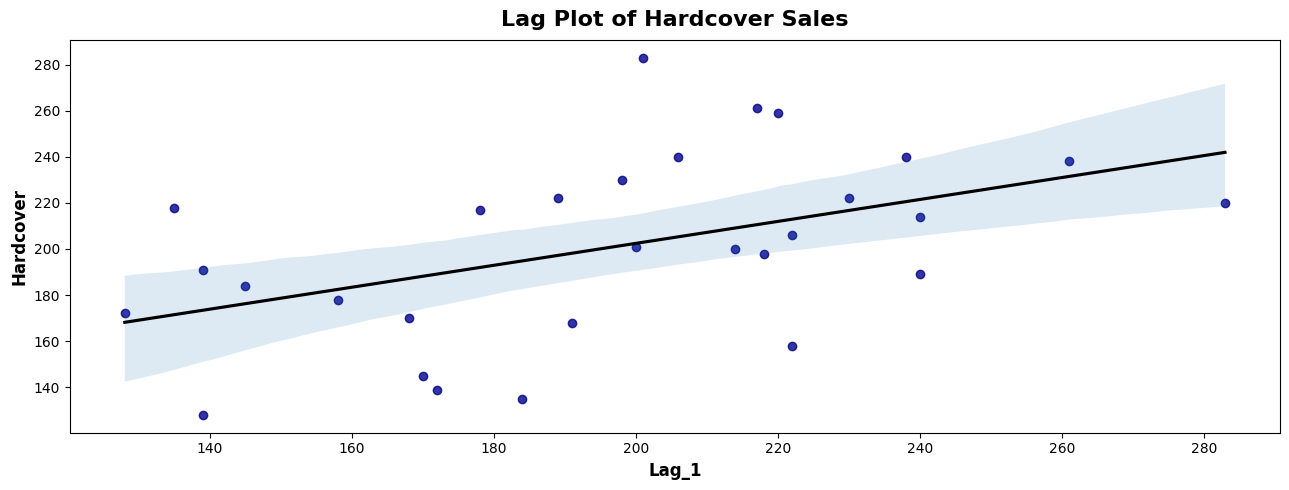

In [106]:
fig, ax = plt.subplots(figsize=(13, 5))

# Agregamos la Regresión Lineal
ax = sns.regplot(
    x='Lag_1',
    y='Hardcover',
    data=book_sales,
    scatter_kws=dict(color='darkblue'),
    ci=95
)

# Ajustamos el color de nuestra Regresión
ax.get_lines()[0].set_color('black')

# Configuramos titulos y ejes
plt.title('Lag Plot of Hardcover Sales')

plt.show()

De igual forma podemos observar una ***correlación*** positiva entre las ventas del día anterior y las ventas actuales. Esto se denomina ***Dependencia Serial***

## **Aplicando nuestra Regresión Lineal**